#  Binary reponses

### Econometrics B (ØkB)

Wooldridge (2010, Ch. 15)

Bertel Schjerning

Department of Economics, University of Copenhagen


<style>
    p { margin-bottom: 0.2em !important; }
    ul, ol { margin-top: 0 !important; margin-bottom: 0 !important; }
</style>

### Binary Response Models  

**Binary outcomes** occur in many real-world decisions where $y \in \{0, 1\}$:

- **Labor force participation:** Will an individual work or not?  
- **Consumer choice:** Will a consumer buy a car or not?  
- **Commuter behavior:** Will a commuter use public transit or not?  
- **Residential decisions:** Will a household move or stay?  
- **College enrollment:** Will a student attend college or not?  
- **Firm behavior:** Will a firm invest, export, or issue a patent?  
- **Student decision:** Will a student take the exam?

Binary outcomes are foundational in **econometric models**, including:

- Discrete choice models (e.g. condtional/multinomial logit)
- Corner solution models and censored regression (e.g., Tobit)  
- Sample selection (e.g., Heckman model)  
- Discrete-continuous choice 
- Duration models (e.g., time until an event)  

### Response Probability  

The response probability function is defined as:

$$
p\left( \mathbf{x} \right) \equiv P\left( y = 1 \mid \mathbf{x} \right) 
= P\left( y = 1 \mid x_{1}, x_{2}, \dots, x_{K} \right)
$$

Where:  
- $y \in \{0, 1\}$ is the binary response (e.g., work vs. not work, buy vs. not buy).  
- $\mathbf{x} \equiv (x_{1}, x_{2}, \dots, x_{K})$ is a vector of explanatory variables.

For a **continuous** explanatory variable $x_{j}$, the **marginal effect** is defined as:

$$
\frac{\partial P\left( y = 1 \mid \mathbf{x} \right)}{\partial x_{j}} 
= \frac{\partial p\left( \mathbf{x} \right)}{\partial x_{j}}
$$

For a **binary** explanatory variable $x_{K}$, the partial effect measures the change when $x_{K}$ switches from 0 to 1:

$$
P\left( y = 1 \mid x_{1}, x_{2}, \dots, x_{K-1}, 1 \right) 
- P\left( y = 1 \mid x_{1}, x_{2}, \dots, x_{K-1}, 0 \right)
$$

**Key Point:**  
Partial effects depend on $\mathbf{x}$ due to the **non-linearity** of $p(\mathbf{x})$.

### Conditional Distribution  

- $y \in \{0, 1\}$ follows a **Bernoulli distribution** conditional on explanatory variables $\mathbf{x}$.  

- The **response probability** is:  
$$
p(\mathbf{x}) \equiv P(y = 1 | \mathbf{x}) \quad \text{and} \quad P(y = 0 | \mathbf{x}) = 1 - p(\mathbf{x})
$$  

- The **conditional probability mass function (PMF)** is:  
$$
f(y | \mathbf{x}) = p(\mathbf{x})^{y} \left[ 1 - p(\mathbf{x}) \right]^{1-y}
$$  

This PMF fully characterizes the distribution of $y$ given $\mathbf{x}$.

- The **first two conditional moments** are:  
    - **Mean:**  
    $$  
    E\left[ y | \mathbf{x} \right] = p(\mathbf{x})  
    $$  

    - **Variance:**  
    $$  
    Var\left( y | \mathbf{x} \right) = p(\mathbf{x}) \left[ 1 - p(\mathbf{x}) \right]  
    $$  
    This shows that the variance is maximized when $p(\mathbf{x}) = 0.5$ and shrinks to zero when $p(\mathbf{x}) = 0$ or $1$.

### How to Specify and Estimate $p(x)$  

- **Parametric Model**:  Suppose $p(x) = G(x, \beta_0)$, where $G(\cdot)$ is a known function with parameters $\beta_0$.  

- **Data**:  We observe a random sample $\{y_i, x_i\}_{i=1, \dots, N}$, where each unit $i$ is randomly selected.

- **Estimation Methods**: If the model is identified, we can estimate $\beta_0$ using data on $y$ and $x$.

    - **Maximum Likelihood Estimation (MLE)**:  
      Use the likelihood function:  
      $$  
      f(y | x; \beta_0) = G(x, \beta_0)^y \left[1 - G(x, \beta_0)\right]^{1-y}
      $$  
      The Maximum Likelihood estimator is:  
      $$
      \hat{\beta}_{\text{MLE}} = \arg \max_{\beta} \frac{1}{N} \sum_{i=1}^{N} \log f(y_i | x_i; \beta)
      $$

    - **Nonlinear Least Squares (NLS)**:  
      Use the conditional expectation:  
      $$  
      E[y | x] = G(x, \beta_0)
      $$  
      The NLS estimator is:  
      $$
      \hat{\beta}_{\text{NLS}} = \arg \min_{\beta} \frac{1}{N} \sum_{i=1}^{N} \left(y_i - G(x_i, \beta)\right)^2
      $$  

### MLE or NLS?  

- **MLE** is asymptotically efficient:  
    - Uses all information about the distribution $f(y | x; \beta_0)$.  
    - **But**: It becomes inconsistent if the distribution is misspecified.  

- **NLS** only relies on the first moment:  
    - Uses $E[y | x] = G(x, \beta_0)$.  
    - Sometimes, NLS is more robust than MLE.  

- **Not in this case**:  
    - If the model for the conditional density $f(y | x; \beta_0)$ is misspecified,  
      the regression model $E[y | x] = G(x, \beta_0)$ is also misspecified.  
    - Both methods depend on the correct specification of $G(x, \beta_0)$.  
    - If MLE is inconsistent, NLS is likely inconsistent too.


### How to Specify $G(x, \beta_0)$?  

There are several **parametric specifications** for $G(x, \beta_0)$:

1. **Linear Probability Model (LPM)**:  
   $$  
   P(y = 1 | x) = G(x, \beta_0) = x \beta_0  
   $$  

2. **Linear Index Models**:  
   $$  
   P(y = 1 | x) = G(x \beta_0), \quad \text{with} \quad 0 < G(z) < 1  
   $$  
   Common examples:  
   - Logit: $G(z) = \frac{1}{1 + e^{-z}}$  
   - Probit: $G(z) = \Phi(z)$, where $\Phi$ is the standard normal CDF.

3. **More general parametric models are feasible**:  
   $$  
   P(y = 1 | x) = G(x, \beta_0)  
   $$  


$G$ is often derived from a **latent variable model** or a **random utility model (RUM)**.

### Linear Probability Model (LPM)  
$$
P(y = 1 | x) = E(y | x) = G(x, \beta_0) = x \beta_0
$$  
#### Advantages: 
* Simple linear regression model.  
* Estimable using **OLS**:  
  $$  
  \hat{\beta} = (x'x)^{-1} x'y
  $$  
* Approximates the **average partial effect (APE)** well.
#### Issues:  
* Predictions may fall outside the $[0, 1]$ interval.  
* **Heteroscedasticity**:  $  
  Var(y | x) = x \beta_0 (1 - x \beta_0)
  $  
  - Conditional variance depends on x
  - OLS is inefficient and gives invalid standard errors.

* Use a **heteroscedasticity-robust** variance matrix (see Equation 12.52 for NLS).

* **Negative variance**: Makes **WLS** infeasible.



### Import libraries

In [1]:
# uncomment to install if not yet installed
# !pip install tabulate
# !pip install wooldridge
# !pip install statsmodels

import numpy as np
from tabulate import tabulate
import numpy.random as random
from scipy.stats import norm
import matplotlib.pyplot as plt
from numpy import linalg as la
import statsmodels.api as sm

### Simulate data from binary response model and estimate LPM 

In [2]:
# Simulate binary response data from probit model
n = 10000  # Number of observations
beta = np.array([0, 1])  # Parameters

# Generate design matrix (constant + explanatory variable)
rng = random.default_rng(seed=43)
x1 = rng.normal(0, 1, (n, len(beta) - 1))
const = np.ones((n, 1))
x_sim = np.concatenate((const, x1), axis=1)

# Define binary response simulation function
def sim_y(x, beta, rng=random.default_rng()):
    beta = beta.reshape(-1, 1) # k x 1
    u = rng.normal(0, 1, (x.shape[0], 1))  # Random noise
    y = (x @ beta + u > 0).astype(float)   # Binary response: 0 or 1
    return y

# Generate the response variable
y_sim = sim_y(x_sim, beta)

### Plot data, response probability fit, conditional variance 

In [3]:
def plot_lpmfit(y, x, beta): 
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    fig.tight_layout(pad=2.0)
    
    # OLS estimate
    bhat = la.inv(x.T @ x) @ x.T @ y
    x1_grid = np.linspace(-2, 2, 100)

    # Plot 1: Data and LPM fit
    axs[0].scatter(x[:, 1], y, alpha=0.6, label='Data')
    axs[0].plot(x1_grid, bhat[0] + x1_grid * bhat[1], color='red', label='LPM fit')
    axs[0].set(xlabel='x1', ylabel='y', title='Model fit vs. Data')
    axs[0].legend()

    # Plot 2: True CDF vs. LPM fit
    axs[1].plot(x1_grid, norm.cdf(beta[0] + x1_grid * beta[1]), label='True CDF')
    axs[1].plot(x1_grid, bhat[0] + x1_grid * bhat[1], label='LPM fit', color='red')
    axs[1].set(xlabel='x1', ylabel='P(y=1 | x1)', title='LPM vs. True P(y=1 | x)')
    axs[1].legend()

    # Plot 3: Predicted variance
    xbhat = bhat[0] + x[:, 1] * bhat[1]
    axs[2].scatter(x[:, 1], xbhat * (1 - xbhat), color='green', alpha=0.6)
    axs[2].set(xlabel='x1', ylabel='Var(y | x)', title='Predicted Var(y | x)')

    plt.show()

### Graphical Illustration of Issues with LPM  

- **Predicted probability** $P(y = 1 | x) = x \beta$ can exceed $[0, 1]$  
- **Conditional variance** $Var(y | x) = x \beta (1 - x \beta)$ depends on $x$ (heteroscedasticity)  
- **Negative variance** occurs when $x \beta$ is outside $[0, 1]$

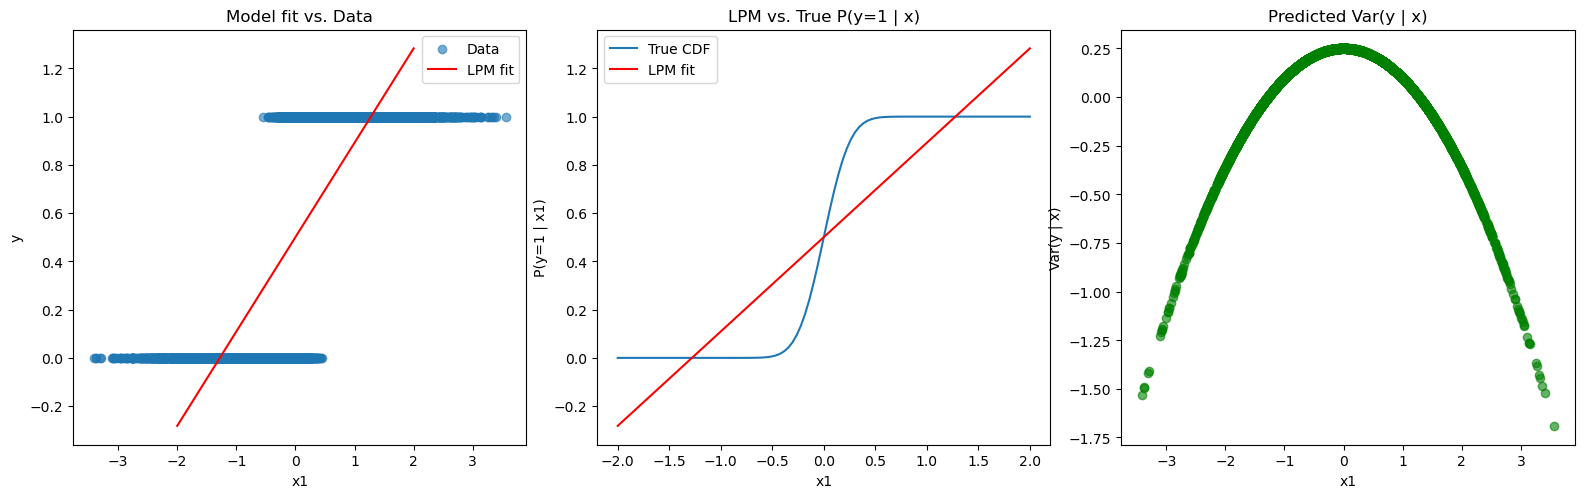

In [4]:
beta = np.array([[0, 5]]).T  # try changing parameters
y_sim = sim_y(x_sim, beta)
plot_lpmfit(y_sim, x_sim, beta)

### Replicate results on Married women's labor force participation
(Example 15.1 Wooldridge (p. 563-564))

Read in data and summarize key variables


In [5]:
import wooldridge
df = wooldridge.data('mroz')
y = df['inlf']  # Binary response variable: Labor force participation
xvars=['nwifeinc','educ', 'exper','expersq','age', 'kidslt6', 'kidsge6']
x = df[xvars].copy()  
x['const'] = 1.0 # Add constant column of 1s

# describe
df[['inlf']+xvars].describe()

,inlf,nwifeinc,educ,exper,expersq,age,kidslt6,kidsge6
count,753.000000,753.000000,753.000000,753.00000,753.000000,753.000000,753.000000,753.000000
mean,0.568393,20.128964,12.286853,10.63081,178.038513,42.537849,0.237716,1.353254
std,0.495630,11.634797,2.280246,8.06913,249.630849,8.072574,0.523959,1.319874
min,0.000000,-0.029057,5.000000,0.00000,0.000000,30.000000,0.000000,0.000000
25%,0.000000,13.025040,12.000000,4.00000,16.000000,36.000000,0.000000,0.000000
50%,1.000000,17.700001,12.000000,9.00000,81.000000,43.000000,0.000000,1.000000
75%,1.000000,24.466000,13.000000,15.00000,225.000000,49.000000,0.000000,2.000000
max,1.000000,96.000000,17.000000,45.00000,2025.000000,60.000000,3.000000,8.000000


### Modeling married women's Labor force participation using LPM
- Estimator for lpm is very simple (OLS)
- Need to use heteroscedasticity robust standard errors (nice exercise)

In [6]:
# Estimate LPM coefficients using OLS
bhat_lpm = la.inv(x.T @ x) @ x.T @ y

# Display results in a table
print(tabulate({"Variable": x.columns, "bhat (LPM)": bhat_lpm}, headers="keys"))

Variable      bhat (LPM)
----------  ------------
nwifeinc    -0.00340517
educ         0.0379953
exper        0.0394924
expersq     -0.000596312
age         -0.0160908
kidslt6     -0.26181
kidsge6      0.0130122
const        0.585519


### LPM estimated with OLS using statsmodels

In [7]:
# You can also estimate linear regression models using canned routines from statsmodels
mod = sm.OLS(y, x)
out_lpm = mod.fit(cov_type='HC0') # use heteroscedasticity robust standard errors (HC0)
print(out_lpm.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     63.15
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           3.02e-71
Time:                        11:46:10   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nwifeinc      -0.0034      0.002     -2.245      0.0

## Latent Variable Model (LVM)

**Latent outcome variable, $y^*$**
\begin{align*}
y^*=x\beta _{0}+\varepsilon
\end{align*}

**Observed outcome, $y \in \{0, 1\}$:**  
\begin{align*}
y = \mathbb{1}(y^{\ast }>0)
\end{align*}


**Response probability**
\begin{align*}
P(y=1|x) &= P( y^{*}>0|x)  \\
&=  P(\varepsilon >-x\beta_{0}|x) \\
&=1-P(\varepsilon <-x\beta_{0}|x) \\
&=1-G( -x\beta _{0}) \text{... $G$ is CDF of $\varepsilon$ conditional on $x$} \\
&=  G( x\beta _{0})  \text{... if $G$ is symmetric around zero}
\end{align*}


### Symmetric distribution

![title](img/symmetric.png)

## Identification Issues
**$\beta$ cannot be identified in the latent variable model**

\begin{align*}
    P\left( y=1|x\right) &=P\left( xc\beta _{0}+c\varepsilon >0|x\right) \\ 
    &=P\left( x\beta _{0}+\varepsilon >0|x\right)  
\end{align*}

* Choice probability $P\left( y=1|x\right) $ does not change if e.g. $\tilde{\beta}=c\beta _{0}$, $\tilde{\varepsilon}=c\varepsilon $ 
* Sample objective function can be maximized for a continuum of values of $c$
* $\beta _{0}$ is only identified up to a scale factor. 

**Solution:** Normalize distribution of $\varepsilon $ by for example by assuming fixed variance




### Identification – Probit Example  

**Latent variable model with normal errors:**  
$$
y = \mathbb{1}(x \beta_0 + \varepsilon > 0), \quad \varepsilon | x \sim N(0, \sigma_0^2)
$$

**Response probability:**  
\begin{aligned}
P(y = 1 | x) &= P(\varepsilon > -x \beta_0 | x) \\
&= 1 - P(\varepsilon < -x \beta_0 | x) \\
&= 1 - P\left(\frac{\varepsilon}{\sigma_0} < \frac{-x \beta_0}{\sigma_0} \Bigg| x\right) \\
&= 1 - \Phi\left(-\frac{x \beta_0}{\sigma_0}\right) \quad \text{(since $\varepsilon / \sigma_0 \sim N(0, 1)$)} \\
&= \Phi\left(\frac{x \beta_0}{\sigma_0}\right) \quad \text{(symmetry of normal distribution)}
\end{aligned}
**Key Point:**  
- The response probability depends only on the **relative size** of $ \beta_0 / \sigma_0 $.  
- This implies that **$\beta_0$** and **$ \sigma_0 $** cannot be separately identified – only the ratio $ \beta_0 / \sigma_0$ is identified in the model.  

### Identification – Probit Example  

* We usually apply the scale normalization $ \text{Var}(\varepsilon | x) = \sigma_0 = 1 $  

$$
P(y = 1 | x) = \Phi(x \beta), \quad \text{where} \quad \beta = \frac{\beta_0}{\sigma_0}
$$

- After the normalization, $ \beta $ is identified.
- Important to keep in mind when interpreting $ \beta $ in binary choice models.
- The effect of $ x $ *appears* smaller when $ \text{Var}(\varepsilon | x) $ is large.
- If $ \beta = \frac{\beta_0}{\sigma_0} $ is identifiable, so is the relative size of two coefficients for explanatory variables $ x_l $ and $ x_k $:

$$
\frac{\beta^l_0 / \sigma_0}{\beta^k_0 / \sigma_0} = \frac{\beta^l_0}{\beta^k_0}
$$

### Probit and Logit are two very popular specifications of $G$  

**Probit:** $G$ is the CDF of the standard *normal* distribution  

$$
G(z) = \Phi(z)
$$

The derivative of $G$ is the standard normal density:
\begin{aligned}
g(z) &= \frac{d\Phi(z)}{dz} = \phi(z)
= (2\pi)^{-1/2} \exp(-z^2 / 2) 
\end{aligned}

**Logit:** $G$ is the CDF of the standard *logistic* distribution  

$$
G(z) = \Lambda(z) = \frac{\exp(z)}{1 + \exp(z)} = \frac{1}{1 + \exp(-z)}
$$

The derivative of $G$ is the standard logistic density:

$$
g(z) = \frac{d\Lambda(z)}{dz} = \frac{\exp(z)}{[1 + \exp(z)]^2} = \frac{\exp(-z)}{[1 + \exp(-z)]^2}
$$

### Python Implementation 

In [8]:
def G(z, model='probit'):
    # Index function for probit and logit models
    if model=='probit':
        return norm.cdf(z)
    elif model=='logit':
        return 1/(1+np.exp(-z))

def g(z, model='probit'):
    # Derivative: g(z)=dG(z)/dz
    if model=='probit':
        return norm.pdf(z)
    elif model=='logit':
        z=-np.abs(z) # use transformation to avoid overflow (ok since g is symmetric)
        return np.exp(z)/(1+np.exp(z))**2

### Some graphs 
(output: see next slide)

In [9]:
def plot_G(scale=1): 
    # If scale=1 plot_G plots the cdf and pdf for standard normal and standard logistic
    # If scale is specified, variance of logistic distribution is scaled by 1/scale. '
    # If scale=1/(np.pi/np.sqrt(3)) the variance of logistic is 1 (like standard normal)
    # If scale=0.25/0.4, logistic is calibrated to have identical density at z=0. i.e. g(0)=0.4 (like standard normal, 0.25 for standard logistic)

    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    z=np.linspace(-4,4,100);  # grid over z (for plotting)
    fig.tight_layout(pad=3.0)
    
    # plot 1: CDF Logit and Probit
    axs[0].plot(z, G(z, 'probit')) 
    axs[0].plot(z, G(z/scale, 'logit')) 
    axs[0].set(xlabel='z', ylabel='G(z)', title='CDF'); 
    axs[0].legend(('Probit', 'Logit'), loc='lower right')

    # plot 2: PDF Logit and Probit
    axs[1].plot(z, g(z, 'probit')) 
    axs[1].plot(z, 1/scale*g(z/scale, 'logit')) 
    axs[1].set(xlabel='z', ylabel='g(z)', title='PDF'); 
    axs[1].legend(('Probit', 'Logit'), loc='lower right')

### Unscaled distributions 

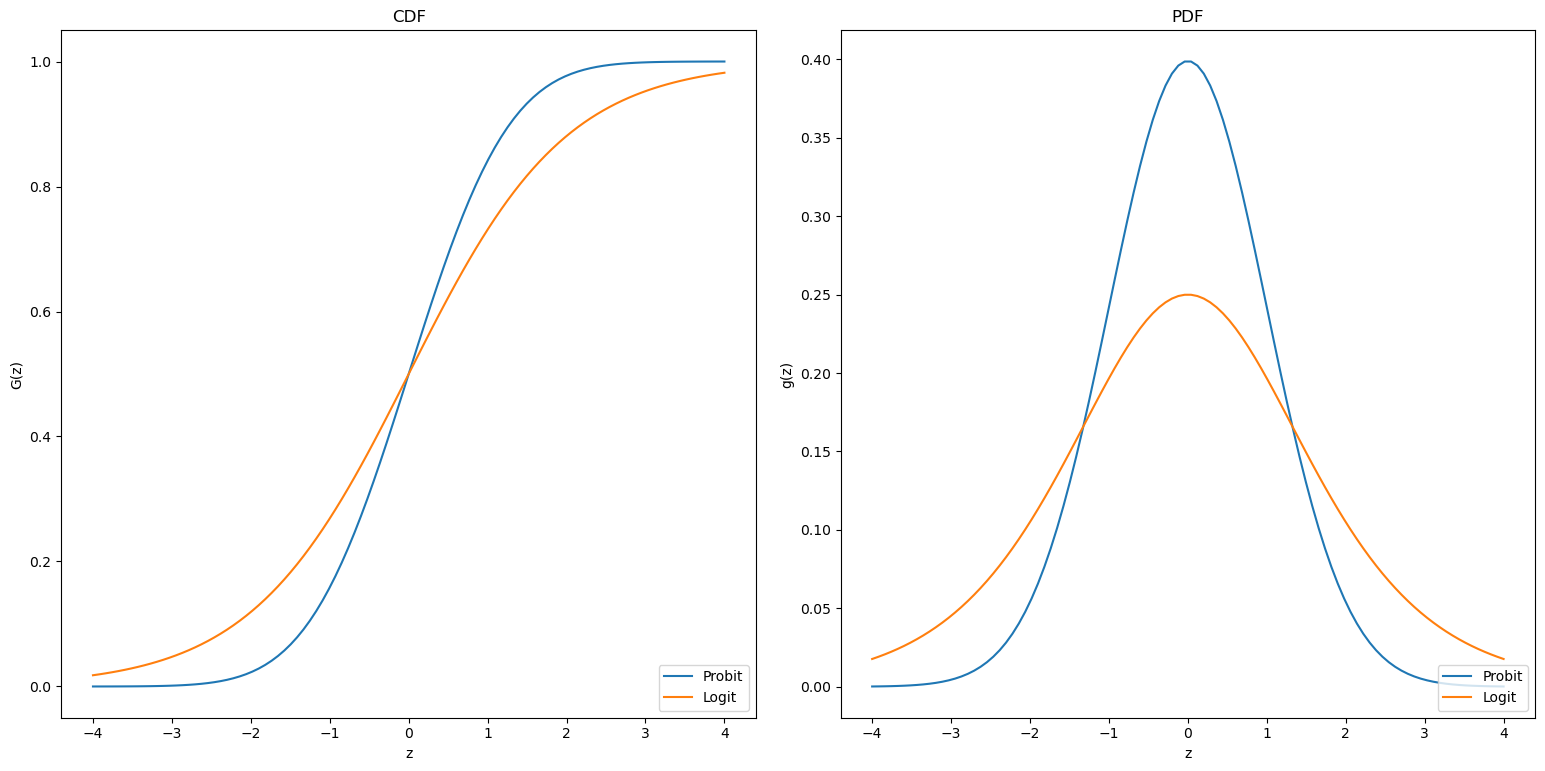

In [10]:
plot_G(scale=1) 

###  Rescaled distributions
Calibrate to have identical density at 0 

When unscaled density is 0.4 for standard normal and 0.25 for standard logistic

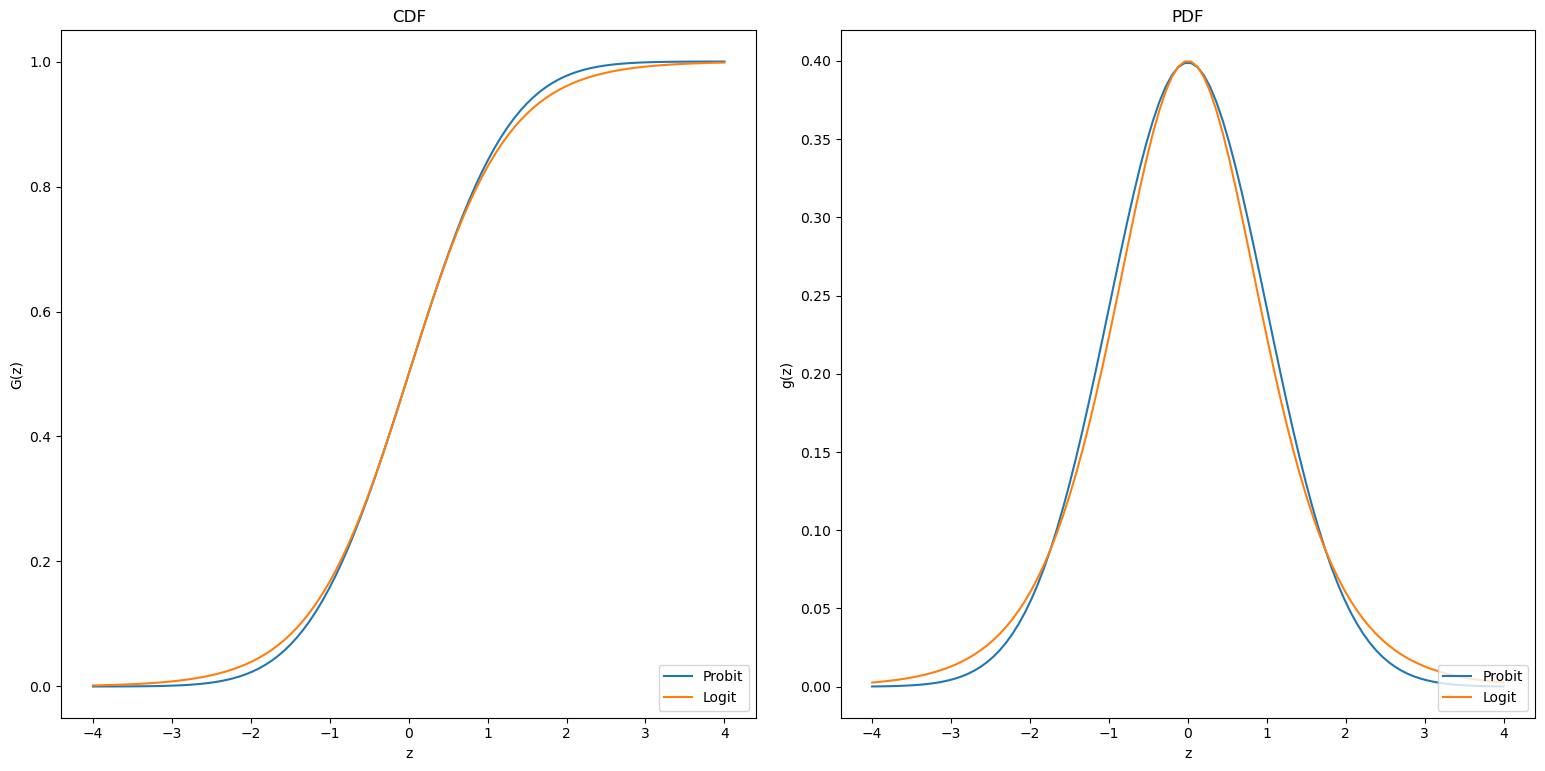

In [11]:
plot_G(scale=0.25/0.4)

## Probit or Logit
Both these choices implies $0<G(z)<1$ so that 
1. Predictions of $P(y=1|x)$ are never outside the unit interval 
1. Condtional variance $Var(y|x)$ is always positve

Logistic and normal distributions are very similar
- Both symmetric
- Logistic distribution have longer tails
- The derivatibes $g(z)\equiv dG(z)/dz>0$  are both positive over infinite domain

Scale is different
- **Probit:** std. dev is $\sigma=1$
- **Logit :** std. dev is $\sigma \simeq \pi/\sqrt(3)=1.8137993642342178$
- but scale differences are irrelevant (and unidentified)
- .... and average partial effects and the ratio $\hat{\beta}_l/\hat{\beta}_k$ are similar across specifications





## Estimation: Likelihood Contributions and Derivatives  

Given a random sample $\{ y_{i}, x_{i} \}_{i=1, \dots, N}$, we can compute the density of $y_i$ conditional on $x_i$:

$$
f(y_i | x_i; \beta) = G(x_i \beta)^{y_i} [1 - G(x_i \beta)]^{1 - y_i}
$$

The **log-likelihood** for observation $i$ is:

$$
\ell_i(\beta) = y_i \log[G(x_i \beta)] + (1 - y_i) \log[1 - G(x_i \beta)]
$$

The **sample log-likelihood function** is:

$$
\log \mathcal{L}(\beta) = N^{-1} \sum_{i=1}^{N} \ell_i(\beta)
$$

The **$1 \times K$ vector of derivatives** for the conditional likelihood contribution is:

\begin{aligned}
\nabla_{\beta} \ell_i(\beta) &= \frac{g(x_i \beta) x_i y_i}{G(x_i \beta)} - \frac{g(x_i \beta) x_i (1 - y_i)}{1 - G(x_i \beta)} \\
&= \frac{g(x_i \beta) x_i [y_i - G(x_i \beta)]}{G(x_i \beta)(1 - G(x_i \beta))}
\end{aligned}


### Python Implementation of log likelihood contributions and derivatives

In [12]:
def logl_i(y, x, beta, model='probit', out='logl'):
    beta=np.array(beta).reshape(-1,1)
    xb=x@beta        # Linear index xb=x1*b1+x2*b2+...+xK*bK
    Gx=G(xb, model)  # Response probability at x
    Gx=np.minimum(np.maximum(Gx,1e-15),1-1e-15)

    logl = np.log(Gx)*y + np.log(1-Gx)*(1-y)     # Nx1 vector of log-likelihood contributions
    if out=='logl': 
        return logl
    
    # Compute derivarives of logl wrt beta
    gx=g(xb, model)                              # Density at xb
    dlogl=gx*x*(y-Gx)/( Gx* (1-Gx))              # NxK matrix of derivatives of logl
 
    if out=='dlogl': 
        return dlogl

    if out=='all':         
        return xb, Gx, gx, logl, dlogl

### Maximum Likelihood (an M-Estimator)  

We can easily reformulate the maximization problem in MLE as a minimization problem:  
\begin{aligned}
\hat{\beta}_{MLE} &= \arg \max_{\beta} N^{-1} \sum_{i=1}^{N} \log f(y_i | x_i; \beta) \\
&= \arg \min_{\theta} N^{-1} \sum_{i=1}^{N} q(w_i, \theta)
\end{aligned}

Where:
- $w_i = (x_i, y_i)$ is the observed data for unit $i$
- $\theta = \beta$ represents the parameters to estimate
- $q(w_i, \theta) = -\log f(y_i | x_i; \beta) = -\ell_i(\beta)$ is the objective function whose expectation we aim to minimize

### Python Implementation of $\hat{\beta}_{MLE}$

In [13]:
from scipy.optimize import minimize

def estim_mle(y, x, model, use_grad=1):
    x = np.array(x)
    N,k=x.shape    
    y = np.array(y).reshape(N, 1)

    # objective function is negative of mean log-likelihood 
    q=lambda beta:    - np.mean(logl_i(y, x,beta, model));

    beta_start = np.zeros(k)  # use vector of zeros starting values   
    
    if use_grad==0: 
        out=minimize(q, x0=beta_start) 
    
    if use_grad==1: 
        grad=lambda beta: - np.mean(logl_i(y, x,beta, model, out='dlogl'), axis=0);
        out=minimize(q, x0=beta_start, jac=grad)
        
    return out

### Output from minimize

In [14]:
model='logit'
out=estim_mle(y, x, model, use_grad=1) # try use_grad=0
display(out)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.5335526575489804
        x: [-2.135e-02  2.212e-01  2.059e-01 -3.154e-03 -8.802e-02
            -1.443e+00  6.011e-02  4.255e-01]
      nit: 31
      jac: [ 1.387e-07  3.332e-08 -1.395e-09 -6.161e-07  7.344e-08
             4.200e-09  1.172e-08  1.946e-09]
 hess_inv: [[ 4.504e-02 -1.020e-01 ... -9.574e-03  5.619e-01]
            [-1.020e-01  1.413e+00 ...  2.895e-01 -1.666e+01]
            ...
            [-9.574e-03  2.895e-01 ...  3.755e+00 -2.157e+01]
            [ 5.619e-01 -1.666e+01 ... -2.157e+01  5.507e+02]]
     nfev: 37
     njev: 37

### Output from minimize converted into estimation output

In [15]:
model='logit'
out=estim_mle(y, x, model, use_grad=1)
print(out.keys())
print('messsage:', out.message)
print('minimize used %d iterations, %d function evaluations and %d evaluations of the jacobian' %  
      (out.nit, out.nfev, out.njev))
N=len(y)
se=np.sqrt(np.diag(out.hess_inv/N));  # standard errors (square rooot of diaginal of Avar=Hinv/N)
table={"":x.columns, "bhat ": out.x, "se ":  se , "t-value ": out.x/se}
print('\nParameter estimates from', model, '\n',tabulate(table, headers="keys",floatfmt="10.4f"))
print('mean logl %g' % -out.fun)
print('\ng*Hinv*g.T: Chi-Square test for gradients beein zero\n', out.jac@ out.hess_inv @out.jac.T)
print('\njac: derivative of (negative of) likehood wrt beta\n', out.jac)
# print(out)

dict_keys(['fun', 'jac', 'hess_inv', 'nfev', 'njev', 'status', 'success', 'message', 'x', 'nit'])
messsage: Optimization terminated successfully.
minimize used 31 iterations, 37 function evaluations and 37 evaluations of the jacobian

Parameter estimates from logit 
                bhat          se     t-value
--------  ----------  ----------  ----------
nwifeinc     -0.0213      0.0077     -2.7600
educ          0.2212      0.0433      5.1054
exper         0.2059      0.0332      6.1980
expersq      -0.0032      0.0011     -2.8635
age          -0.0880      0.0141     -6.2455
kidslt6      -1.4434      0.1915     -7.5384
kidsge6       0.0601      0.0706      0.8512
const         0.4255      0.8552      0.4975
mean logl -0.533553

g*Hinv*g.T: Chi-Square test for gradients beein zero
 1.1916952065172395e-15

jac: derivative of (negative of) likehood wrt beta
 [ 1.38714391e-07  3.33207419e-08 -1.39479135e-09 -6.16108461e-07
  7.34437154e-08  4.19990597e-09  1.17214694e-08  1.94556160e-09]


## Recap: Inference Setup for M-Estimators and MLE

$$
\hat{\theta} \in \arg\min_{\theta \in \Theta} \frac{1}{N} \sum_{i=1}^{N} q(w_i, \theta) \quad \text{(M-estimator)}
$$  

Under regular conditions, $\hat{\theta}$ is $\sqrt{N}$-asymptotically normal:

$$
\sqrt{N}(\hat{\theta} - \theta_0) \overset{d}{\to} N \left( 0, A_0^{-1} B_0 A_0^{-1} \right)
$$

where 
$$
A_0 = E \left[ H_q(w_i, \theta_0) \right], \quad 
B_0 = E \left[ s(w_i, \theta_0) s(w_i, \theta_0)' \right]
$$

and 
$$ s(w, \theta) = \frac{\partial}{\partial \theta} q(w, \theta), \quad (P \times 1)
$$
$$
H_q(w, \theta) = \frac{\partial^2}{\partial \theta \partial \theta'} q(w, \theta), \quad (P \times P)
$$

- How to estimate $\text{Avar}(\hat{\theta}) = A_0^{-1} B_0 A_0^{-1} / N$?
- Keep in mind that $q(w_i, \theta) = -\log f(y_i | x_i; \beta) = -\ell_i(\beta)$, so $A_0=E[H_q(x_i, \beta_0)]=-E[H_{logl}(x_i, \beta_0)]$
- For MLE, the information identity ensures that $B_0=A_0$ if the model is well specified so that $\text{Avar}(\hat{\theta}) = A_0^{-1}/ N$
- How to consistently estimate $A_0$ and/or $B_0$?

## Inference

For inference, we use the expectation of the Hessian (valid due to information identidity):  
$$
\text{Avar}(\hat{\beta}) = A_0/N = -E[H(x_i, \beta_0)]/N
$$

To obtain the $K \times K$ **Hessian matrix** of the likelihood, we differentiate the score function once more:

$$
H(x_i, \beta) = -\frac{g(x_i, \beta)^2 x'_i x_i}{G(x_i, \beta)(1 - G(x_i, \beta))} + [y_i - G(x_i, \beta)]L(x_i, \beta)
$$

Here, $L(x_i, \beta)$ is a complicated function of $x_i$ but $[y_i - G(x_i, \beta)]L(x_i, \beta)$ has expectation 0 when the likelihood is maximized. Thus:

$$
-E[H(x_i, \beta_0) | x_i] = A(x_i, \beta_0) = \frac{g(x_i, \beta_0)^2 x'_i x_i}{G(x_i, \beta_0)(1 - G(x_i, \beta_0))}
$$

We can then estimate $\text{Avar}(\hat{\beta})$ as:

$$
\widehat{\text{Avar}(\hat{\beta})} = \left\{ N^{-1} \sum_{i=1}^N A(x_i, \beta) \right\}^{-1}/N = 
\left\{ \sum_{i=1}^N \frac{g(x_i, \hat{\beta})^2 x'_i x_i}{G(x_i, \hat{\beta})(1 - G(x_i, \hat{\beta}))} \right\}^{-1}
$$

### Python Implementation $\widehat{\text{Avar}(\hat{\beta})}$

In [16]:
# derivatives of likelihood contribution
def avar(y, x, beta, model, cov_type='Ainv'):
    x = np.array(x)
    N,k=x.shape    
    y = np.array(y).reshape(N, 1)
    beta = np.array(beta).reshape(k, 1)

    xb, Gx, gx, logl, dlogl  = logl_i(y, x, beta, model, out='all')
    A=(gx*x).T @(gx*x/(Gx* (1-Gx)))
    if cov_type=='Ainv':
        return la.inv(A)    

    B=(dlogl).T @ dlogl # equals outer product of scores [sum_i(s_i*s_i')]
    if cov_type=='Binv':
        return la.inv(B)
    if cov_type=='sandwich':
        return la.inv(A) @ B @ la.inv(A)

bhat=out.x
print('Standard errors')
for cov_type in ['Ainv', 'Binv', 'sandwich']:
    V=avar(y, x, bhat, model, cov_type)
    se= np.sqrt(np.diag(V))
    print(cov_type, se.round(5))


Standard errors
Ainv [0.00842 0.04344 0.03206 0.00102 0.01457 0.20358 0.07479 0.86037]
Binv [0.00784 0.04273 0.03203 0.00103 0.01479 0.20513 0.07043 0.86335]
sandwich [0.00907 0.04442 0.03227 0.00101 0.01443 0.20303 0.07983 0.85916]


### Compare results with and without analytical derivatives

In [17]:
# Output from minimize with and without derivatives
res_p_nograd=estim_mle(y,x,model, use_grad=0)
res_p=estim_mle(y,x,model, use_grad=1)
print('number of iterations - with gradients    : ', res_p.nit)
print('number of iterations - without gradients : ', res_p_nograd.nit)
print('number of function evaluations - with gradients   : ', res_p.nfev)
print('number of function evaluations - without gradients: ', res_p_nograd.nfev)
print('number of function evaluations - without gradients/(1+# of parameters): ', res_p_nograd.nfev/9)

number of iterations - with gradients    :  31
number of iterations - without gradients :  31
number of function evaluations - with gradients   :  37
number of function evaluations - without gradients:  333
number of function evaluations - without gradients/(1+# of parameters):  37.0


### Replicate results in Example 15.2 (Wooldridge, p. 580)
Table 15.1: LPM, Logit and Probit Estimates of of Labor Force Participation

In [18]:
# LPM estimated by OLS: 
beta_lpm=la.inv(x.T@x)@x.T@y  

# Estimate probit and logit using MLE 
for model in ["probit", "logit"]:
    out[model]=estim_mle(y,x,model)
    out[model].beta=out[model].x
    out[model].avar=avar(y, x, out[model].beta, model, cov_type='Ainv')
    out[model].se=np.sqrt(np.diag(out[model].avar))
    
# Table with parameter estimates
table={"":x.columns,"bhat (lpm)": beta_lpm, "se(lpm)": out_lpm.bse, 
       "bhat (probit)": out['probit'].beta, "se(probit)": out['probit'].se,  
       "bhat (logit)": out['logit'].beta, "se(logit)": out['logit'].se}  
print('\nParameter Estimates\n', tabulate(table, headers="keys",floatfmt="10.3f"))



Parameter Estimates
             bhat (lpm)     se(lpm)    bhat (probit)    se(probit)    bhat (logit)    se(logit)
--------  ------------  ----------  ---------------  ------------  --------------  -----------
nwifeinc        -0.003       0.002           -0.012         0.005          -0.021        0.008
educ             0.038       0.007            0.131         0.025           0.221        0.043
exper            0.039       0.006            0.123         0.019           0.206        0.032
expersq         -0.001       0.000           -0.002         0.001          -0.003        0.001
age             -0.016       0.002           -0.053         0.008          -0.088        0.015
kidslt6         -0.262       0.032           -0.868         0.118          -1.443        0.204
kidsge6          0.013       0.013            0.036         0.044           0.060        0.075
const            0.586       0.151            0.270         0.508           0.425        0.860


### Goodness of fit

In [19]:
from scipy.stats import chi2

# Log-likelihood and Pseudo-R-squared
const=np.array(x['const']).reshape(-1,1)
N=len(y)
for model in ["probit", "logit"]:
    onlyconst=estim_mle(y,const,model, use_grad=1)
    out[model].logl0=-onlyconst.fun*N        # log-likelihood at restricted model (only constant)

    out[model].logl=-out[model].fun*N  # log-likelihood at unrestricted model (estimated above)
    out[model].R2=1.0-out[model].logl/out[model].logl0 # Pseudo R-squred

    
r=np.array(y)-np.array(x)@bhat_lpm
R2_lpm=1-sum(r**2)/sum((y-np.mean(y))**2)
df=out[model].beta.size-1 # degrees of freedom for LR test
crit=chi2.ppf(0.95,df) # cirtical value (5 pct significance level)
print('crit', crit)

table={"":["Log-likelihood", "Log-likelihood (only constant)",  "LR test", "Chi Square Critical value (df=%d)" % df, "Pseudo R^2"], 
       "lpm " :   ["", "", "", "", R2_lpm.round(5)],
       "logit " : [out['logit'].logl, out['logit'].logl0, 2*(out['logit'].logl-out['logit'].logl0), crit, out['logit'].R2 ],
       "probit " :[out['probit'].logl, out['probit'].logl0, 2*(out['probit'].logl-out['probit'].logl0), crit, out['probit'].R2]}

print(tabulate(table, headers="keys",floatfmt="10.3f"))
print("\nNumber of observartions, N=%i\n" % N)

 

crit 14.067140449340167
                                  lpm          logit      probit
--------------------------------  -------  ----------  ----------
Log-likelihood                               -401.765    -401.302
Log-likelihood (only constant)               -514.873    -514.873
LR test                                       226.216     227.142
Chi Square Critical value (df=7)               14.067      14.067
Pseudo R^2                        0.26422       0.220       0.221

Number of observartions, N=753



### Partial Effects - computation

**Discrete change**

\begin{equation*}
PE_{\Delta x_{k}}\left( x^{0}\right) =P\left(
y=1|x_{1}^{0},x_{2}^{0},..,x_{k}^{0}+\Delta x_{k}^{0},..,x_{K}^{0}\right)
-P\left( y=1|x^{0}\right) 
\end{equation*}

If $x_{k}$ is a dummy variable: $x_{k}=0$, $\Delta x_{k}=1$%

Remark: If $x_{k}$ is continuous, then we often take effect relative to $%
\Delta x_{k}$.%

**Marginal Change**

\begin{equation*}
\left. \frac{\partial P\left( y=1|x\right) }{\partial x_{k}}\right \vert
_{x=x^{0}}=\underset{\text{density, }>0}{\underbrace{g\left( x^{0}\beta \right) }}\beta _{k}\text{, where }g\left( z\right) =\frac{\partial G}{%
\partial z}
\end{equation*}



### Partial Effects - identification
**Scale of $\beta $ or $G$ is irrelevant for the partial effects.**

Suppose $P\left( y=1|x\right) =G\left( x\beta \right) =\tilde{G}\left(
x\beta /\sigma \right) $

\begin{equation*}
\left. \frac{\partial P\left( y=1|x\right) }{\partial x_{k}}\right \vert
_{x=x^{0}}=\underset{\text{density, }>0}{\underbrace{\tilde{g}\left(
x^{0 }\beta /\sigma \right) }}\beta _{k}/\sigma \text{, where }\tilde{g} \left( z\right) =\frac{\partial \tilde{G}}{\partial z}
\end{equation*}

- Partial effect only depends on $\beta /\sigma $- which is what we can
identify
- Hence, the normalization $\sigma =1$ is without loss of generality - if interest is in the partial effect
- $\beta _{j}$ determines the sign of partial effect (in binary choice
models)



### Partial Effects

In LPM - partial effects are always equal to $\beta _{j}$

In LVM - $\beta _{j}$ determines the sign of partial effects - but magnitude depends on $x^{0}$

Which $x^{0}$ to choose?

1. $x^{0}$ sample mean of $x$
2. sample enumeration (evaluate PE at the data and take the sample average)

APE and PEA may be very different since $p(x) $ is nonlinear (example on next slide)
- 1) estimates *partial effect at the average* (PEA)
- 2) estimates *average partial effect* (APE)



### Partial effect as function of $x_1$
Suppose $\beta _{1}<0$

![title](img/partial.png)

### LPM is often a good approximation of APE
* $\hat{\beta}_{LPM}=(x'x)^{-1}x'y$ can be a good approximation of average partial effects (APE)
* if both $x$ and $\varepsilon$ are normally LPM is asymptotically  equivalent to APE for probit
* LPM inadequate if interest lies in the distribution of partial effects

  beta, true    parameter estimate, bhat_lpm    Avereage partial effects, APE
------------  ------------------------------  -------------------------------
           0                         0.50058                          0
           5                         0.39117                          0.38476


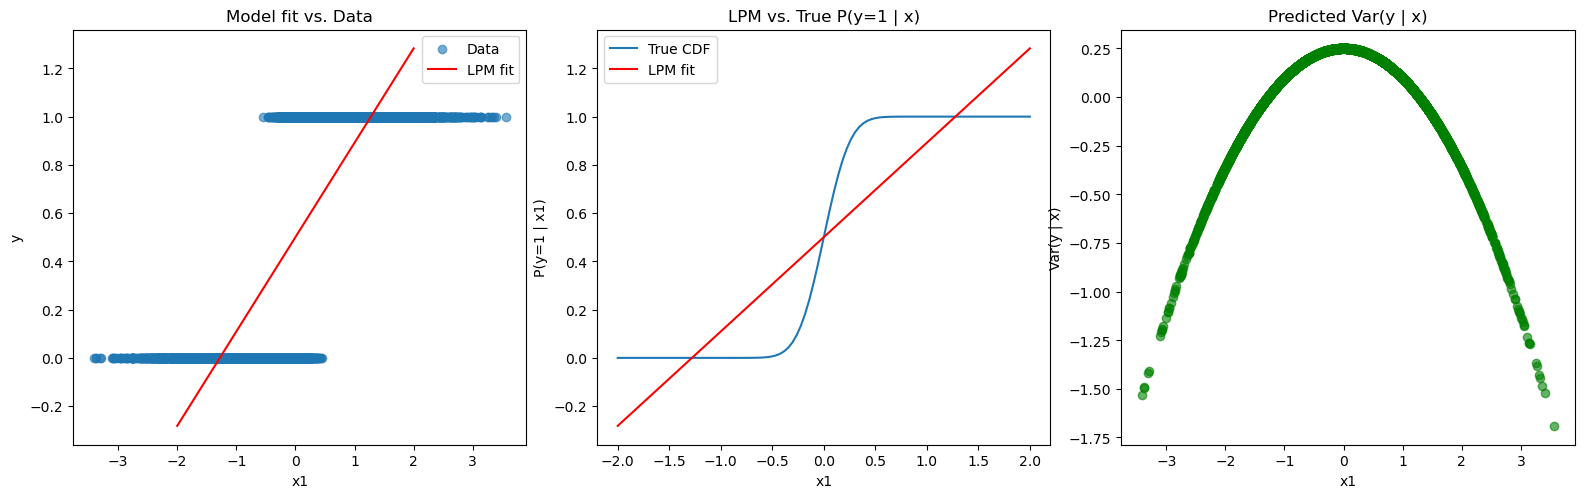

In [20]:
# Estimate LPM using OLS and compare to APE (using our simulated data from above)
bhat_simdata_lpm=la.inv(x_sim.T@x_sim)@x_sim.T@y_sim
APE_simdata=np.mean(norm.pdf(x_sim@beta))*beta
table={"beta, true": beta, "parameter estimate, bhat_lpm": bhat_simdata_lpm.round(5), "Avereage partial effects, APE": APE_simdata.round(5)}
print(tabulate(table, headers="keys"))
plot_lpmfit(y_sim, x_sim, beta)

### Partial Effects in our empirical example 

In [21]:
# Estimate LPM using OLS and compare to APE (using our data on labor force participation)
bhat_lpm=la.inv(x.T@x)@x.T@y 

for model in ["probit", "logit"]:
    out[model].APE = np.mean(g(x@out[model].beta, model))*out[model].beta
    out[model].PEA = g(np.mean(x,axis=0)@ out[model].beta, model)*out[model].beta

table={"":x.columns[1:],
        "lpm": bhat_lpm[1:], 
       "logit": out['logit'].beta[1:], 
       "probit": out['probit'].beta[1:],
       "APE (logit)":  out['logit'].APE[1:], 
       "APE (probit)": out['probit'].APE[1:],
       "PEA (logit)":  out['logit'].PEA[1:], 
       "PEA (probit)": out['probit'].PEA[1:]}

print(tabulate(table, headers="keys",floatfmt="10.3f"))

                lpm       logit      probit    APE (logit)    APE (probit)    PEA (logit)    PEA (probit)
-------  ----------  ----------  ----------  -------------  --------------  -------------  --------------
educ          0.038       0.221       0.131          0.039           0.039          0.054           0.051
exper         0.039       0.206       0.123          0.037           0.037          0.050           0.048
expersq      -0.001      -0.003      -0.002         -0.001          -0.001         -0.001          -0.001
age          -0.016      -0.088      -0.053         -0.016          -0.016         -0.021          -0.021
kidslt6      -0.262      -1.443      -0.868         -0.258          -0.261         -0.351          -0.339
kidsge6       0.013       0.060       0.036          0.011           0.011          0.015           0.014
const         0.586       0.425       0.270          0.076           0.081          0.103           0.105


### Scaling of parameters
**Logit**

$PE_{x_{k}}^{L}\left( x^{0}\right) =\beta _{k}^{L}\left. \frac{\partial \Lambda }{\partial z}\right \vert _{z=x^{0\prime }\beta }=\beta
_{k}^{L}\frac{\exp \left( x^{0}\beta ^{L}\right) }{\left[ 1+\exp
\left( x^{0 }\beta ^{L}\right) \right] ^{2}}$

**Probit:**

$PE_{x_{k}}^{P}\left( x^{0}\right) =\beta _{k}^{P}\phi \left(
x^{0}\beta ^{P}\right) = \beta _{k}^{P} (2\pi)^{-1/2} \exp(-(x^{0}\beta ^{P})^2 / 2)  $


We can "Calibrate" at coefficients to have same partial effect at $x^0\beta =0$
\begin{align*}
PE_{x_{k}}^{L}\left( 0\right) &=&\beta _{k}^{L}\frac{1}{4} \\
PE_{x_{k}}^{L}\left( 0\right) &=&\beta _{k}^{P}\frac{1}{\sqrt{2\pi }}
\end{align*}

\begin{equation*}
\beta _{k}^{L}\frac{1}{4}\simeq \beta _{k}^{P}\frac{1}{\sqrt{2\pi }}
\Rightarrow \beta _{k}^{L}\simeq \beta _{k}^{P}\frac{4}{\sqrt{2\pi }}
=1.60\cdot \beta _{k}^{P}
\end{equation*}

### Scaling of parameters

In [22]:
scale=4/np.sqrt(2*np.pi)
table={"":x.columns,
       "bhat (lpm)":    bhat_lpm.round(5), 
       "bhat (logit)":  out['logit' ].x ,  
       "bhat (probit)": out['probit'].x ,
       "bhat (logit) / scale": out['logit'].x/ scale }
print('\nUnscaled and scaled coefficients\n', tabulate(table, headers="keys",floatfmt="10.3f"))
print('\nScale', scale)



Unscaled and scaled coefficients
             bhat (lpm)    bhat (logit)    bhat (probit)    bhat (logit) / scale
--------  ------------  --------------  ---------------  ----------------------
nwifeinc        -0.003          -0.021           -0.012                  -0.013
educ             0.038           0.221            0.131                   0.139
exper            0.039           0.206            0.123                   0.129
expersq         -0.001          -0.003           -0.002                  -0.002
age             -0.016          -0.088           -0.053                  -0.055
kidslt6         -0.262          -1.443           -0.868                  -0.904
kidsge6          0.013           0.060            0.036                   0.038
const            0.586           0.425            0.270                   0.267

Scale 1.5957691216057308


### The relative size of coefficients on two different variables does not depend on scale


In [23]:
table={"":x.columns,
       "bhat (lpm)":    bhat_lpm/bhat_lpm[2], 
       "bhat (logit)":  out['logit' ].x/out['logit' ].x[2] , 
       "bhat (probit)": out['probit'].x/out['probit'].x[2]}
print('\nCoefficients relative to coefficent on educ\n', tabulate(table, headers="keys",floatfmt="10.4f"))


Coefficients relative to coefficent on educ
             bhat (lpm)    bhat (logit)    bhat (probit)
--------  ------------  --------------  ---------------
nwifeinc       -0.0862         -0.1037          -0.0975
educ            0.9621          1.0743           1.0613
exper           1.0000          1.0000           1.0000
expersq        -0.0151         -0.0153          -0.0153
age            -0.4074         -0.4276          -0.4285
kidslt6        -6.6294         -7.0110          -7.0397
kidsge6         0.3295          0.2920           0.2919
const          14.8261          2.0666           2.1896


### Some takeaways on LPM, probit and Logit

- Probit and logit is very similar
    - logistic and normal distributions are very similar (both symmetric, although logistic distribution have longer tails)
    - partial effects and ratio between parameter estimates very similar     
    - latent variable model requires scale normalization to obtain identification
    - usually estimated using MLE

- LPM 
    - easy to estimate (OLS)
    - easy to allow for endgeonous variables, unobserved effects, dynamics, etc
    - prediction of $P(y=1|x)$ can fall outside [0,1] and Var$(\varepsilon|x)$ can be negative
    - assumes constant partial effects which is very unrealistic
    - ....but LPM is often a good approximation of APE
 